**SUMMARY OF PROBLEM STATEMENT:**
      Pneumonia is an infection in one or both lungs. The diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lungcancer, or post-radiation or surgical changes.Comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis.
      A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift.
     So automating Pneumonia screening in chest radiographs, and providing affected area details through bounding box will assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare.

In [1]:
#Upgrading the kaggle version
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674/kaggle-1.5.6-cp36-none-any.whl
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [2]:
#Loading the rsna-pneumonia-detection-challenge dataset
import os
os.environ['KAGGLE_USERNAME'] = "elamathisenguttuvan" # username from the json file
os.environ['KAGGLE_KEY'] = "fb56946ad9d3fd4da4d5d2287a3498df" # key from the json file
!kaggle competitions download -c rsna-pneumonia-detection-challenge

rsna-pneumonia-detection-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#Installing pydicom library
!pip3 install -q pydicom                          

In [4]:
#Extracting the dataset files
path_to_zip_file='/content/rsna-pneumonia-detection-challenge.zip'
directory_to_extract_to='/content/rsna-pneumonia-detection-challenge'
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [5]:
 TEST_DIR='/content/rsna-pneumonia-detection-challenge/stage_2_test_images'
TRAIN_DIR='/content/rsna-pneumonia-detection-challenge/stage_2_train_images'

In [6]:
#The train and test pathnames are retrieved and stored in array format
import glob
test_images = glob.glob(TEST_DIR + '/*.dcm')
train_images=glob.glob(TRAIN_DIR + '/*.dcm')


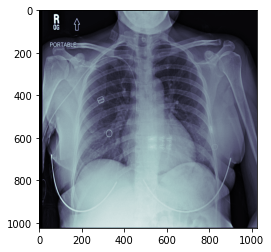

TensorShape([1024, 1024, 3])

In [7]:
#Visualizing the data
import pydicom
import numpy as np

ds = pydicom.read_file(test_images[2]) 
image = ds.pixel_array 
last_axis = -1
grscale_img_3dims = np.expand_dims(image, last_axis)
import matplotlib.pyplot as plt
plt.imshow(image, cmap=plt.cm.bone)
plt.show()
import tensorflow as tf
img=tf.constant(grscale_img_3dims)
rgb_img=tf.image.grayscale_to_rgb(img, name=None)
rgb_img.get_shape()

In [8]:
#Loading the labels dataset
import pandas as pd
train_lbls=pd.read_csv('/content/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv')
test_lbls=pd.read_csv('/content/rsna-pneumonia-detection-challenge/stage_2_sample_submission.csv')
detail=pd.read_csv('/content/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv')

In [9]:
train_lbls.head(1)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0


In [10]:
test_lbls.head(1)

,patientId,PredictionString
0,0000a175-0e68-4ca4-b1af-167204a7e0bc,0.5 0 0 100 100


In [11]:
filter=train_lbls.apply(lambda x:x['Target']==1,axis=1)
tar_lbls=train_lbls[filter]
tar_lbls.head()

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1
14,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1


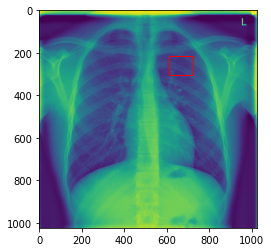

In [12]:
#Visualization of image with bounding box
i=123
import pydicom
ds = pydicom.read_file(train_images[i]) 
image = ds.pixel_array 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
figure, ax = plt.subplots(1)
x=train_lbls.iloc[i]['x']
y=train_lbls.iloc[i]['y']
w=train_lbls.iloc[i]['width']
h=train_lbls.iloc[i]['height']
rect = patches.Rectangle((x,y),w,h, edgecolor='r', facecolor="none")
ax.imshow(image)
ax.add_patch(rect)


**IMAGE PREPROCESSING**

In [13]:
scale = ( 224 / 1024)

134 177 24 -19


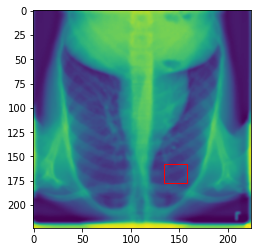

In [14]:

#Visualization of image with bounding box
i=123
import pydicom
import cv2
ds = pydicom.read_file(train_images[i]) 
image = ds.pixel_array 
grscale_img_3dims = np.expand_dims(image, last_axis)
dim=(224,224)
res = cv2.resize(grscale_img_3dims, dim, interpolation=cv2.INTER_LINEAR)
blur = cv2.GaussianBlur(res, (5, 5), 0)
flip=cv2.flip(blur,0)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
figure, ax = plt.subplots(1)
x=int(np.round(train_lbls.iloc[i]['x']*scale))
y=224-int(np.round(train_lbls.iloc[i]['y']*scale))
w=int(np.round(train_lbls.iloc[i]['width']*scale))
h=-int(np.round(train_lbls.iloc[i]['height']*scale))
rect = patches.Rectangle((x,y),w,h, edgecolor='r', facecolor="none")
ax.imshow(flip)
ax.add_patch(rect)
print(x,y,w,h)

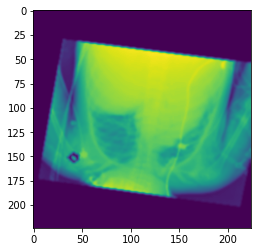

In [15]:
ds = pydicom.read_file(train_images[7]) 
image = ds.pixel_array 
grscale_img_3dims = np.expand_dims(image, last_axis)
dim=(224,224)
res = cv2.resize(grscale_img_3dims, dim, interpolation=cv2.INTER_LINEAR)
blur = cv2.GaussianBlur(res, (5, 5), 0)
flip=cv2.flip(blur,0)
plt.imshow(flip)

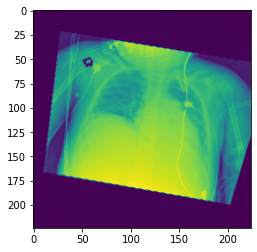

In [16]:
import random
ds = pydicom.read_file(train_images[7]) 
image = ds.pixel_array 
grscale_img_3dims = np.expand_dims(image, last_axis)
dim=(224,224)
res = cv2.resize(grscale_img_3dims, dim, interpolation=cv2.INTER_LINEAR)
angle = int(random.uniform(-180, 180))
h, w = res.shape[:2]
M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
img = cv2.warpAffine(res, M, (w, h))
plt.imshow(img)

In [17]:
y_train=train_lbls
y_train=np.array(y_train)
Y_train=[]
X_train=[]


In [18]:
x_train=[]

#resizing training set
for i in range(5000):
  ds = pydicom.read_file(train_images[i]) 
  image = ds.pixel_array 
  last_axis = -1
  grscale_img_3dims = np.expand_dims(image, last_axis)
  dim=(224,224)
  res = cv2.resize(grscale_img_3dims, dim, interpolation=cv2.INTER_LINEAR)
  stacked_img = np.stack((res,)*3, axis=-1)
  X_train.append(stacked_img)

In [19]:
import math

for i in range(5000):
  x=y_train[i][1]
  if(math.isnan(x)):
    y_train[i][1]= y_train[i][1]
    y_train[i][2]=y_train[i][2]
    y_train[i][3]=y_train[i][3]
    y_train[i][4]=y_train[i][4]
    Y_train.append(y_train[i]) 
  else:
     y_train[i][1]=int(np.round(y_train[i][1]*scale))
     y_train[i][2]=int(np.round(y_train[i][2]*scale))
     y_train[i][3]=int(np.round(y_train[i][3]*scale))
     y_train[i][4]=int(np.round(y_train[i][4]*scale))
     Y_train.append(y_train[i]) 
    

In [20]:
#Adding Horizontal flip images
x_train=[]

#training set
for i in range(5000):
  ds = pydicom.read_file(train_images[i]) 
  image = ds.pixel_array 
  last_axis = -1
  grscale_img_3dims = np.expand_dims(image, last_axis)
  dim=(224,224)
  res = cv2.resize(grscale_img_3dims, dim, interpolation=cv2.INTER_LINEAR)
  stacked_img = np.stack((res,)*3, axis=-1)
  blur = cv2.GaussianBlur(stacked_img, (5, 5), 0)
  flip=cv2.flip(blur,1)
  X_train.append(flip)

In [21]:
import math

for i in range(5000):
  x=y_train[i][1]
  if(math.isnan(x)):
    y_train[i][1]= y_train[i][1]
    y_train[i][2]=y_train[i][2]
    y_train[i][3]=y_train[i][3]
    y_train[i][4]=y_train[i][4]
    Y_train.append(y_train[i]) 
  else:
     y_train[i][1]=224-int(np.round(y_train[i][1]*scale))
     y_train[i][2]=int(np.round(y_train[i][2]*scale))
     y_train[i][3]=-int(np.round(y_train[i][3]*scale))
     y_train[i][4]=int(np.round(y_train[i][4]*scale))
     Y_train.append(y_train[i]) 
    

In [22]:
len(Y_train)

10000

In [23]:
#Adding Vertical flip images
x_train=[]

#training set
for i in range(5000):
  ds = pydicom.read_file(train_images[i]) 
  image = ds.pixel_array 
  last_axis = -1
  grscale_img_3dims = np.expand_dims(image, last_axis)
  dim=(224,224)
  res = cv2.resize(grscale_img_3dims, dim, interpolation=cv2.INTER_LINEAR)
  stacked_img = np.stack((res,)*3, axis=-1)
  blur = cv2.GaussianBlur(stacked_img, (5, 5), 0)
  flip=cv2.flip(blur,0)
  X_train.append(flip)

In [24]:
import math

for i in range(5000):
  x=y_train[i][1]
  if(math.isnan(x)):
    y_train[i][1]= y_train[i][1]
    y_train[i][2]=y_train[i][2]
    y_train[i][3]=y_train[i][3]
    y_train[i][4]=y_train[i][4]
    Y_train.append(y_train[i]) 
  else:
     y_train[i][1]=int(np.round(y_train[i][1]*scale))
     y_train[i][2]=224-int(np.round(y_train[i][2]*scale))
     y_train[i][3]=int(np.round(y_train[i][3]*scale))
     y_train[i][4]=-int(np.round(y_train[i][4]*scale))
     Y_train.append(y_train[i]) 
    

In [25]:
len(X_train)

15000

**MODEL BUILDING:**
        

In [26]:
from keras import Sequential
from keras.applications import VGG19 #For Transfer Learning
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=.3)

In [41]:
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (224,224,3), classes =5)
model= Sequential()
model.add(base_model) 

model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
model.add(Flatten()) 
model.add(Dense(5,activation=('softmax'))) 

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
dense_15 (Dense)             (None, 7, 7, 1024)        525312    
_________________________________________________________________
dense_16 (Dense)             (None, 7, 7, 512)         524800    
_________________________________________________________________
dense_17 (Dense)             (None, 7, 7, 256)         131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
dense_18 (Dense)             (None, 7, 7, 128)         32896     
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)             

In [60]:
batch_size= 100
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])


In [57]:
X_train = np.asarray(X_train)

X_train.shape

(10500, 224, 224, 3)

In [58]:
Y_Train=[]
from pandas import DataFrame
df=DataFrame(Y_train,columns=['Id','x','y','w','h','target'])
df.drop(['Id'],axis=1,inplace=True)
Y_Train=df.to_numpy(dtype=np.float)
Y_Train.shape

(10500, 5)

In [61]:
model.fit(X_train,Y_Train,epochs = epochs, verbose = 1)

Epoch 1/5
329/329 [==============================] - 144s 438ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/5
329/329 [==============================] - 144s 437ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/5
329/329 [==============================] - 143s 436ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/5
329/329 [==============================] - 144s 438ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/5
329/329 [==============================] - 144s 438ms/step - loss: nan - accuracy: 0.0000e+00
